# Proyecto del Día 10 - Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

No dejes de usar tu creatividad, explora, diviértete y en el medio de todo eso, aprende.

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(style="darkgrid")

# 1. Cargar el dataset

In [3]:
diamonds = sns.load_dataset("diamonds")

# 2. Análisis exploratorio

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Columna por columna:

| Columna  | Tipo     | Descripción |
|----------|----------|-------------|
| `carat`  | float64  | Peso del diamante en quilates. |
| `cut`    | object   | Calidad del corte (Fair, Good, Very Good, Premium, Ideal). |
| `color`  | object   | Color del diamante (de D [mejor] a J [peor]). |
| `clarity`| object   | Claridad del diamante (de I1 [peor] a IF [mejor]). |
| `depth`  | float64  | Profundidad total = z / media(x, y) [%]. |
| `table`  | float64  | Anchura del facetado superior del diamante en relación al ancho máximo [%]. |
| `price`  | int64    | Precio en dólares americanos (USD). |
| `x`      | float64  | Longitud en mm. |
| `y`      | float64  | Ancho en mm. |
| `z`      | float64  | Profundidad en mm. |

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [9]:
diamonds['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [11]:
diamonds['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [12]:
diamonds.corr(numeric_only=True)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


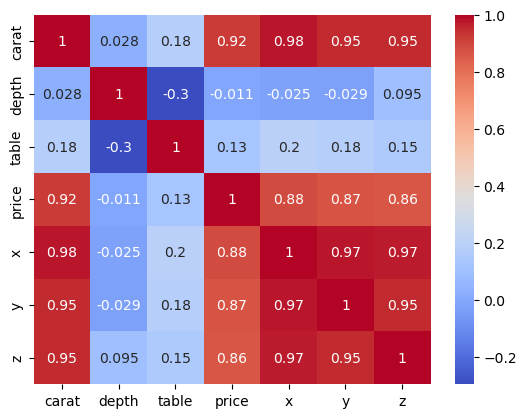

In [13]:
import matplotlib.pyplot as plt
sns.heatmap(diamonds.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## 3. Visualizaciones

### 3.1 Relaciones entre variables numéricas

Text(0.5, 0.98, 'Relación entre el peso y el precio de los diamantes')

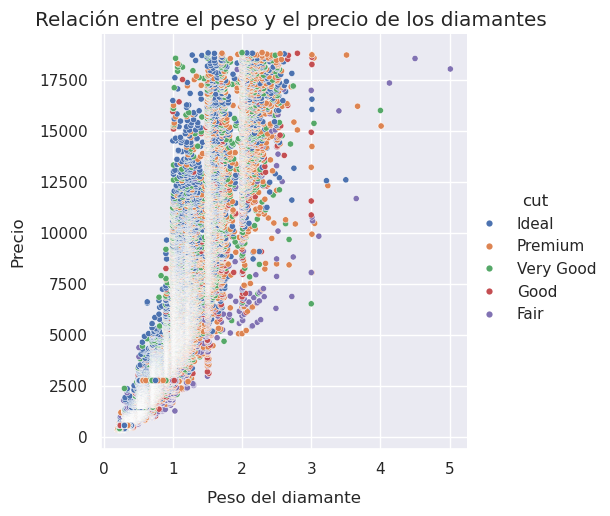

In [9]:
g = sns.relplot(
    data=diamonds, 
    x="carat", 
    y="price",
    hue="cut",
    s=20
)
g.set_axis_labels("Peso del diamante", "Precio", labelpad=10)
g.figure.suptitle("Relación entre el peso y el precio de los diamantes", va="baseline", ha="center")

- Relación fuertemente positiva y no perfectamente lineal entre quilates y precio.

- A mayor carat, mayor precio, pero con mucha más variabilidad (y ruido) en los rangos altos.

- La línea azul de regresión es una media global, y no se ajusta bien a los extremos.

Text(0.5, 0.98, 'Relación entre la profundidad y el precio de los diamantes')

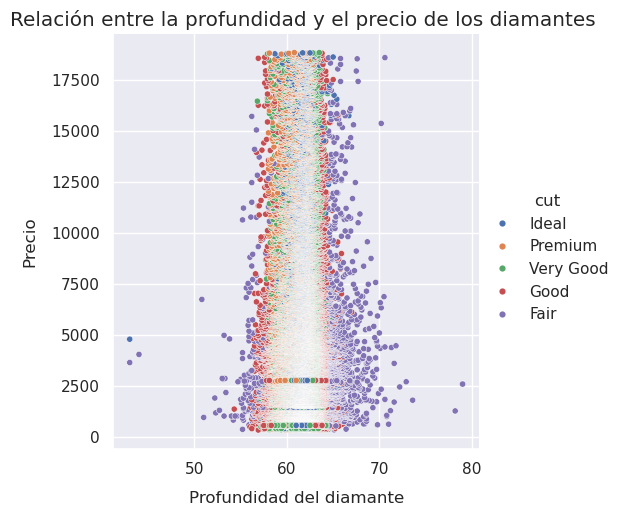

In [11]:
g = sns.relplot(
    data=diamonds, 
    x="depth", 
    y="price",
    hue="cut",
    s=20
)
g.set_axis_labels("Profundidad del diamante", "Precio", labelpad=10)
g.figure.suptitle("Relación entre la profundidad y el precio de los diamantes", va="baseline", ha="center")

Text(0.5, 0.98, 'Relación entre la tabla y el precio de los diamantes')

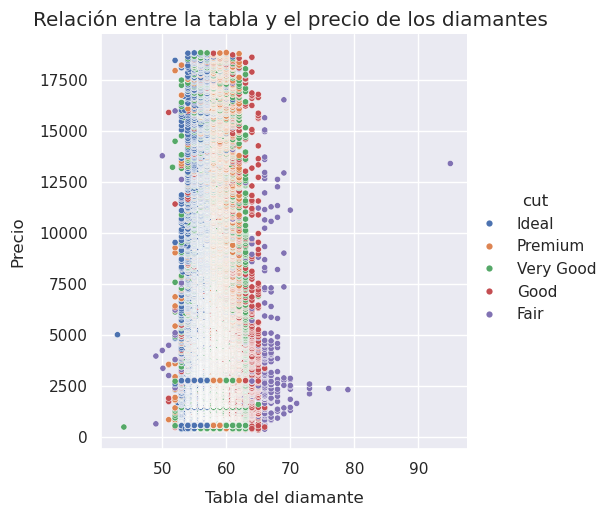

In [12]:
g = sns.relplot(
    data=diamonds, 
    x="table", 
    y="price",
    hue="cut",
    s=20
)
g.set_axis_labels("Tabla del diamante", "Precio", labelpad=10)
g.figure.suptitle("Relación entre la tabla y el precio de los diamantes", va="baseline", ha="center")

### 3.2 Distribuciones de variables numéricas

Text(0.5, 0.98, 'Distribución del precio de los diamantes')

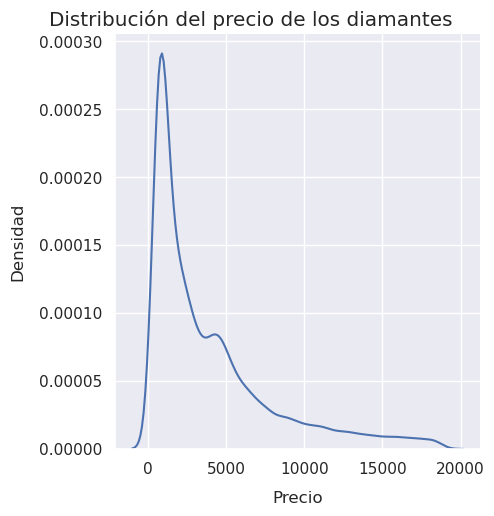

In [13]:
g = sns.displot(
    data=diamonds, 
    x="price", 
    kind="kde",
)
g.set_axis_labels("Precio", "Densidad", labelpad=10)
g.figure.suptitle("Distribución del precio de los diamantes", va="baseline", ha="center")

El gráfico muestra la **distribución estimada** del precio de los diamantes usando un KDE (Kernel Density Estimate).

- **Eje X**: el valor de la variable `price` (precio en USD).
- **Eje Y**: la **densidad de probabilidad estimada**, no la frecuencia ni el número de diamantes.

> 🧠 **Importante**: el área total bajo la curva es igual a **1**.  
> Esto significa que la curva muestra la **probabilidad relativa** de que un precio esté cerca de un cierto valor, no cuántos diamantes hay en un valor exacto.

#### 🔍 Observaciones del gráfico:

- Hay un **pico claro** cerca de los **$1000–$2000**, lo que indica que la mayoría de los diamantes tienen precios bajos.
- A medida que el precio aumenta, la **densidad disminuye**, es decir, **menos diamantes** tienen precios altos.
- La cola larga a la derecha muestra que **existen diamantes caros**, pero son **poco comunes**.

#### ✅ Conclusión:
El gráfico KDE es útil para visualizar cómo se distribuye el precio de forma suave y continua, y confirma que el dataset está **sesgado hacia precios bajos**.


Text(0.5, 0.98, 'Distribución del precio de los diamantes')

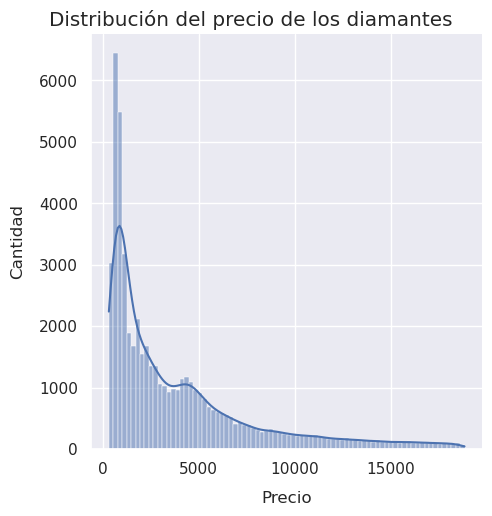

In [14]:
g = sns.displot(
    data=diamonds, 
    x="price", 
    kind="hist",
    kde=True
)
g.set_axis_labels("Precio", "Cantidad", labelpad=10)
g.figure.suptitle("Distribución del precio de los diamantes", va="baseline", ha="center")

Text(0.5, 0.98, 'Distribución del precio de los diamantes por corte')

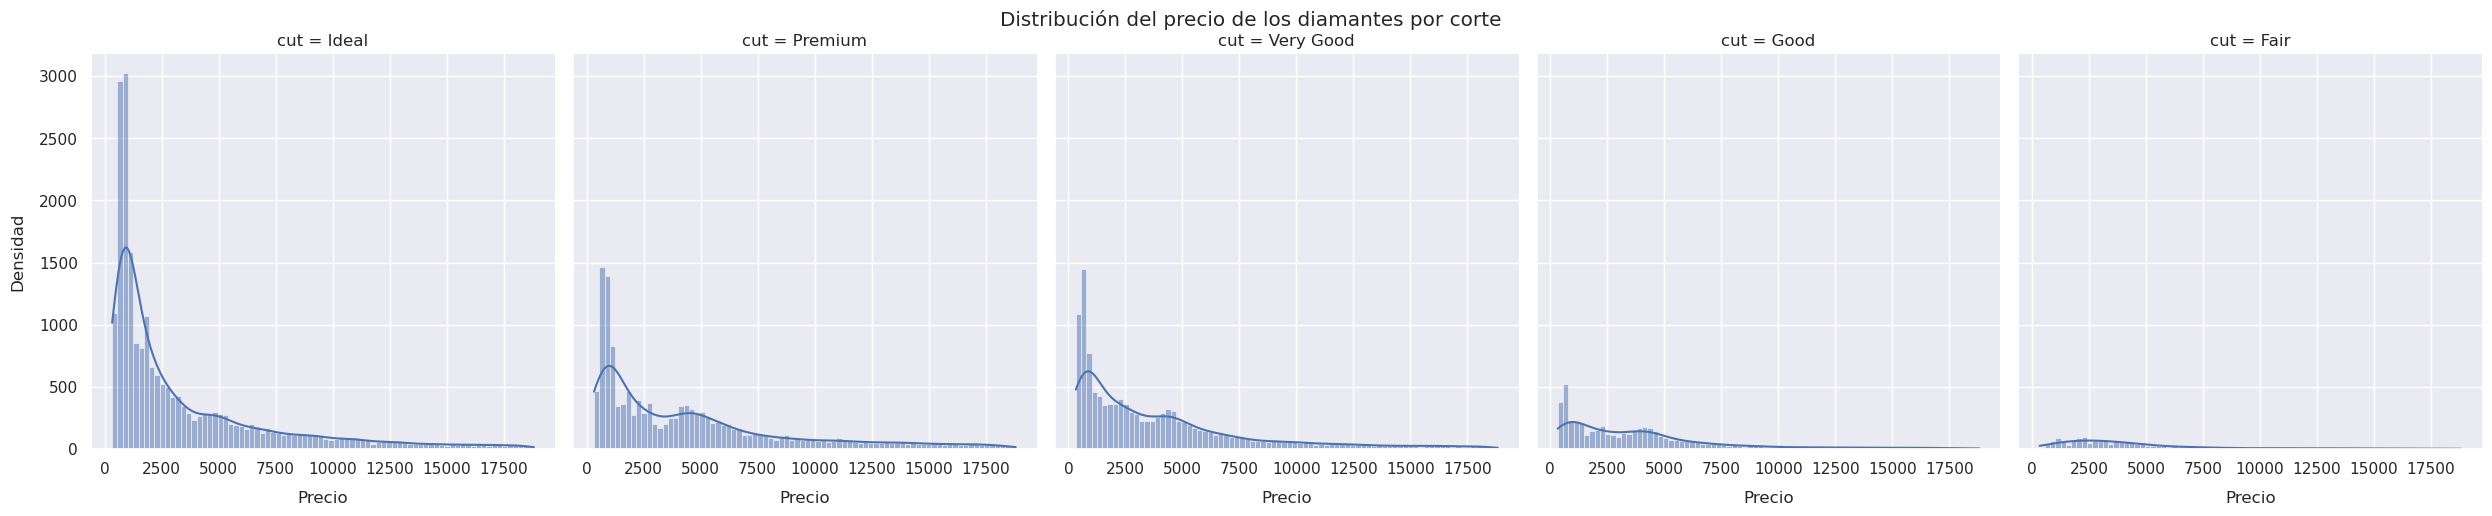

In [16]:
g = sns.displot(
    data=diamonds, 
    x="price", 
    kind="hist",
    col="cut",
    kde=True
)
g.set_axis_labels("Precio", "Densidad", labelpad=10)
g.figure.suptitle("Distribución del precio de los diamantes por corte", va="baseline", ha="center")

Text(0.5, 0.98, 'Distribución del peso de los diamantes')

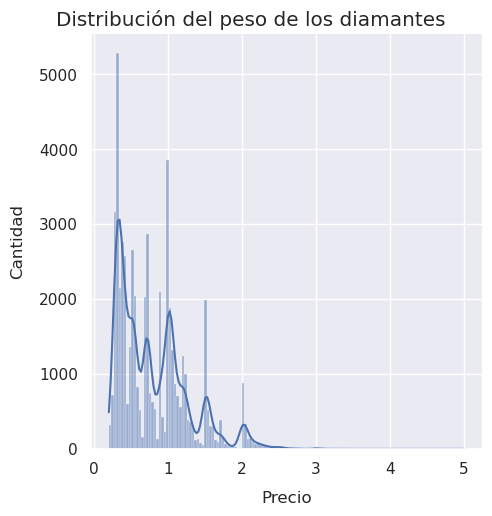

In [19]:
g = sns.displot(
    data=diamonds, 
    x="carat", 
    kind="hist",
    kde=True
)
g.set_axis_labels("Precio", "Cantidad", labelpad=10)
g.figure.suptitle("Distribución del peso de los diamantes", va="baseline", ha="center")

Text(0.5, 0.98, 'Distribución del peso de los diamantes por corte')

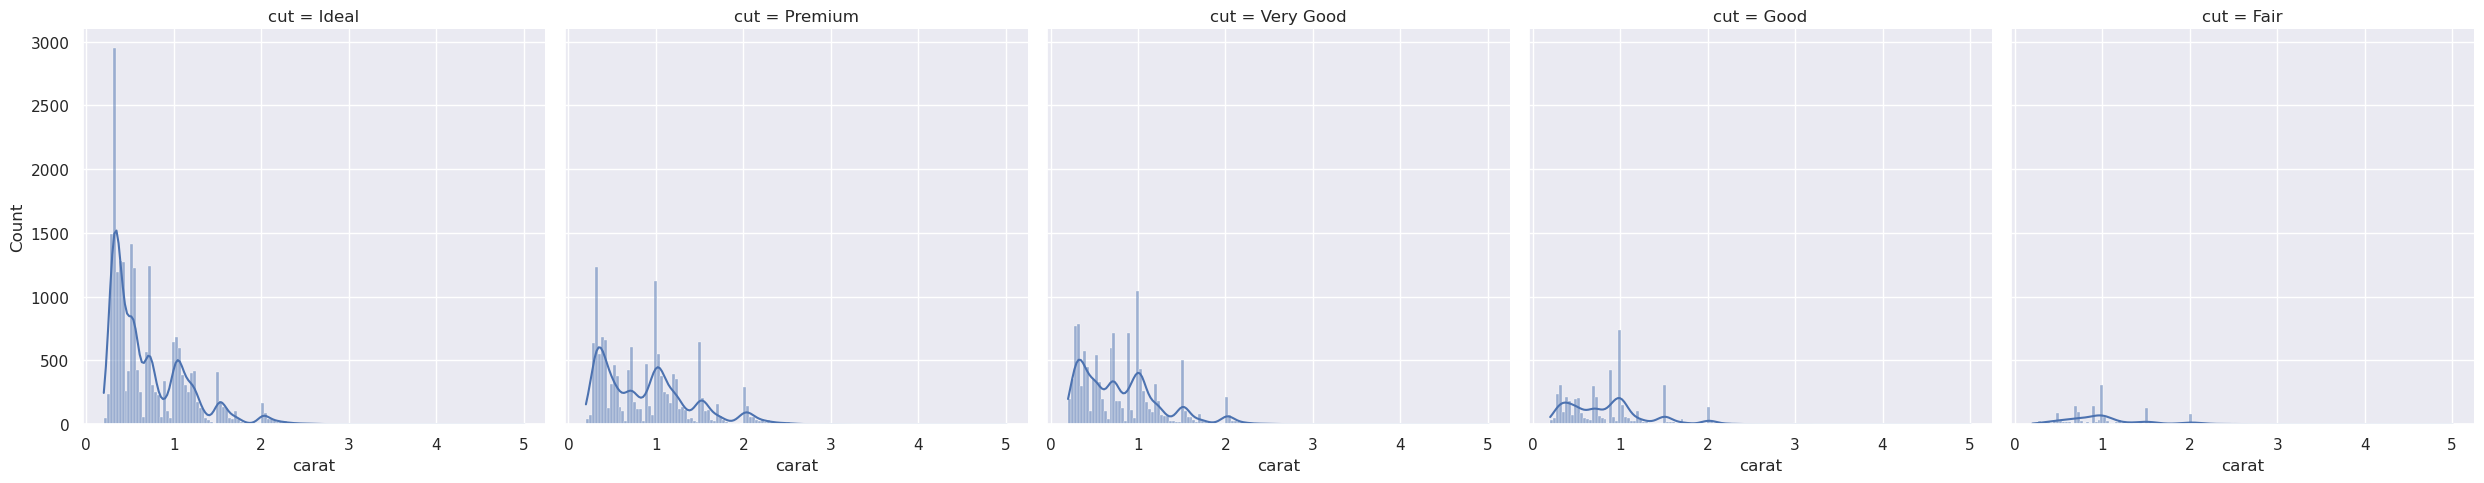

In [18]:
sns.displot(
    data=diamonds, 
    x="carat", 
    kind="hist",
    kde=True,
    col="cut"
)
g.set_axis_labels("Precio", "Densidad", labelpad=10)
g.figure.suptitle("Distribución del peso de los diamantes por corte", va="baseline", ha="center")

### 3.3 Comparaciones de variables numéricas agrupadas entre categorías

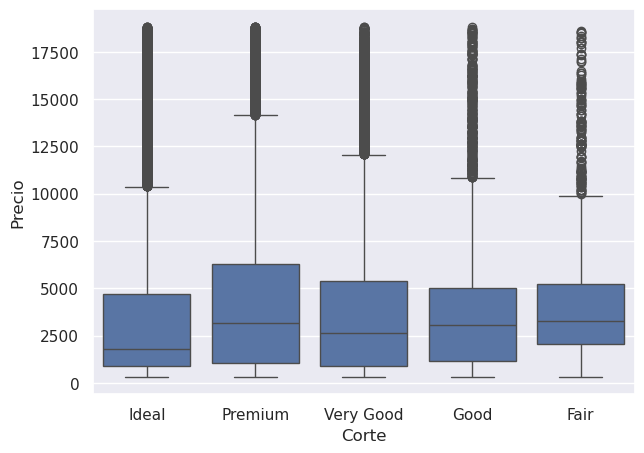

In [21]:
ax = sns.boxplot(
    data=diamonds, 
    x="cut", 
    y="price"
)
ax.set_xlabel("Corte")
ax.set_ylabel("Precio")
ax.figure.set_size_inches(7, 5)


#### 🔹 1. Mediana del precio
- La **mediana** (línea dentro de cada caja) es más alta en los diamantes con corte **Premium**.
- El corte **Ideal**, a pesar de ser considerado el de mejor calidad, tiene una mediana más baja que Premium y Very Good.

#### 🔹 2. Dispersión del precio
- El grupo **Premium** presenta la mayor **dispersión** (rango intercuartílico más alto).
- Los cortes **Good** y **Fair** tienen una dispersión más estrecha, indicando menos variabilidad de precios.

#### 🔹 3. Outliers
- Todos los grupos tienen **numerosos outliers**, representados por puntos individuales por encima del bigote superior.
- Estos valores extremos representan diamantes con precios significativamente más altos que el resto.

#### 🔹 4. Comparación entre cortes
- Aunque el corte Ideal es técnicamente superior, **no siempre se traduce en un mayor precio**.
- Esto sugiere que el precio está influenciado por **múltiples factores**, no solo por el corte.

---

### ✅ Conclusión
El corte del diamante influye en el precio, pero no lo determina completamente. Es evidente que existen muchos factores adicionales (como el peso en quilates, la claridad y el color) que afectan el valor final. Para un análisis más completo, se recomienda cruzar esta variable con otras numéricas del conjunto de datos.


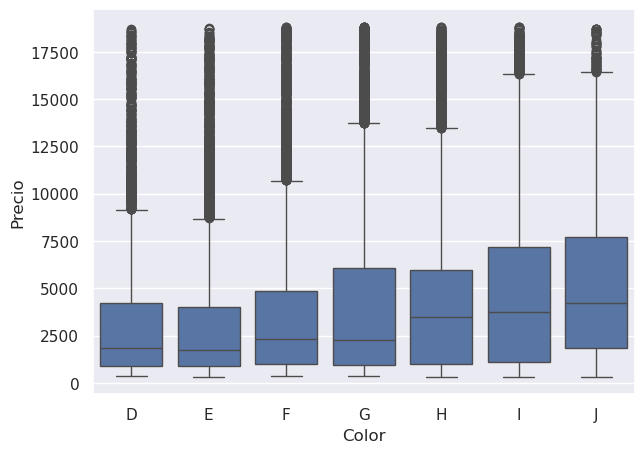

In [82]:
ax = sns.boxplot(
    data=diamonds,
    x="color", 
    y="price"
)
ax.set_xlabel("Color")
ax.set_ylabel("Precio")
ax.figure.set_size_inches(7, 5)

#### 🔹 1. Mediana del precio
- El precio **aumenta gradualmente** desde el color `D` hasta `J`.
- La mediana más baja se encuentra en `E`, mientras que los diamantes con color `J` tienen la **mediana de precio más alta**.

#### 🔹 2. Dispersión del precio
- La **dispersión** del precio (altura de la caja y bigotes) también aumenta con colores más bajos (de `D` a `J`).
- Esto indica que los diamantes con **peor color tienden a tener más variabilidad de precios**.

#### 🔹 3. Outliers
- Todos los grupos presentan muchos **outliers**, especialmente en las categorías con mayor precio (`H`, `I`, `J`).
- Los diamantes de color `J` tienen precios muy altos en algunos casos, lo que sugiere que están acompañados por otras cualidades valiosas (como gran tamaño).

#### 🔹 4. Comparación general
- Aunque normalmente se esperaría que **mejor color implique mayor precio**, aquí se observa lo contrario: **diamantes con peor color (como `I` y `J`) tienen precios más altos**.
- Esto sugiere que el **color no es el único factor determinante del precio**, y debe analizarse junto con `carat`, `cut`, y `clarity`.

---

### ✅ Conclusión

El precio de los diamantes **tiende a aumentar con colores más bajos en calidad** (de `D` a `J`), lo cual puede deberse a que esos diamantes suelen tener otros atributos compensatorios como mayor tamaño (`carat`). El color, por sí solo, **no determina el precio**, y debe analizarse en combinación con otras variables numéricas.


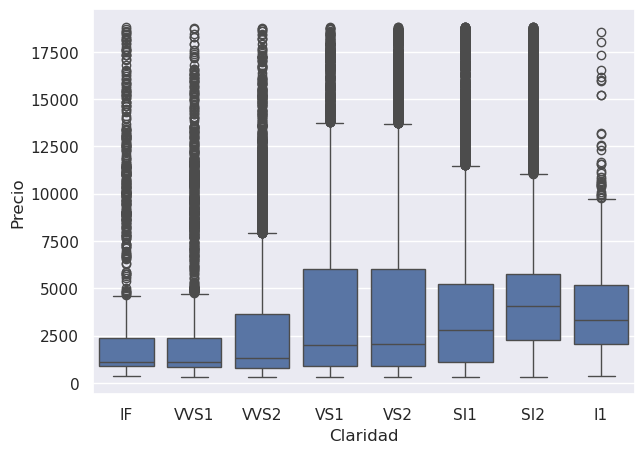

In [81]:
ax = sns.boxplot(
    data=diamonds, 
    x="clarity", 
    y="price"
)
ax.set_xlabel("Claridad")
ax.set_ylabel("Precio")
ax.figure.set_size_inches(7, 5)

#### 🔹 1. Mediana del precio
- Sorprendentemente, las categorías con mejor claridad (`IF`, `VVS1`, `VVS2`) tienen **medianas de precio más bajas** que las categorías más bajas como `SI2` o incluso `I1`.
- La mediana más alta se encuentra en la categoría **VS2** o **SI2**, no en las de claridad superior.

#### 🔹 2. Dispersión del precio
- Las categorías intermedias (`VS1`, `VS2`, `SI1`, `SI2`) muestran **mayor dispersión** de precios, con cajas más grandes y mayor número de outliers.
- `IF` y `VVS1`, a pesar de ser más puras, muestran **menor variabilidad** de precio.

#### 🔹 3. Outliers
- Todas las categorías presentan una gran cantidad de **outliers**, especialmente en los niveles intermedios y bajos de claridad.
- Esto sugiere que hay diamantes con claridad regular que, debido a otros factores (peso, corte, etc.), pueden alcanzar precios muy altos.

#### 🔹 4. Comparación general
- En contra de lo esperado, **mayor claridad no implica mayor precio** en este conjunto de datos.
- Es probable que los diamantes con menor claridad pero **mayor peso (`carat`) o mejor corte (`cut`)** estén elevando el precio en esas categorías.

---

### ✅ Conclusión

Aunque la claridad es un factor importante en la calidad de un diamante, no parece ser **el principal determinante del precio** en este dataset. Las categorías intermedias como `VS2` o `SI2` presentan los precios más altos, lo que sugiere que otros factores como el peso y el corte tienen un peso mayor en el valor final del diamante.


## 4. Utilizar `jointplot()`

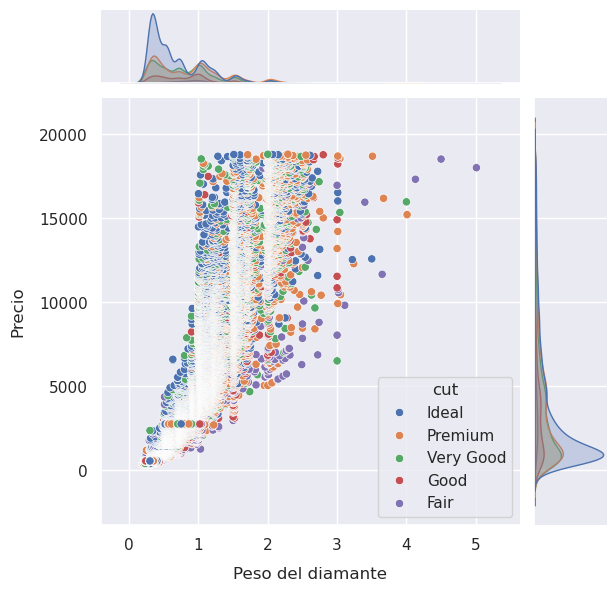

In [94]:
g = sns.jointplot(
    data=diamonds, 
    x="carat", 
    y="price",
    hue="cut"
)
g.set_axis_labels("Peso del diamante", "Precio", labelpad=10)

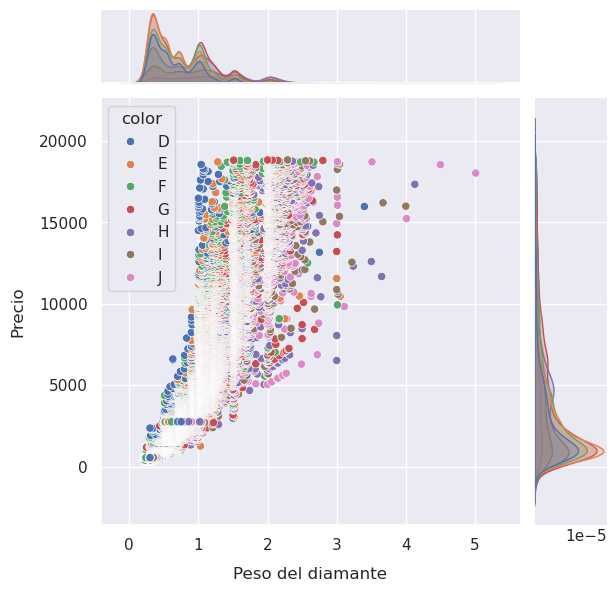

In [95]:
g = sns.jointplot(
    data=diamonds, 
    x="carat", 
    y="price",
    hue="color"
)
g.set_axis_labels("Peso del diamante", "Precio", labelpad=10)

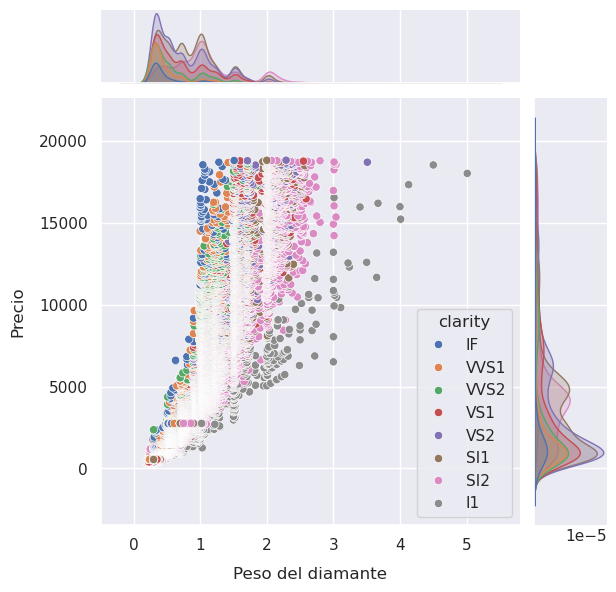

In [96]:
g = sns.jointplot(
    data=diamonds, 
    x="carat", 
    y="price",
    hue="clarity"
)
g.set_axis_labels("Peso del diamante", "Precio", labelpad=10)

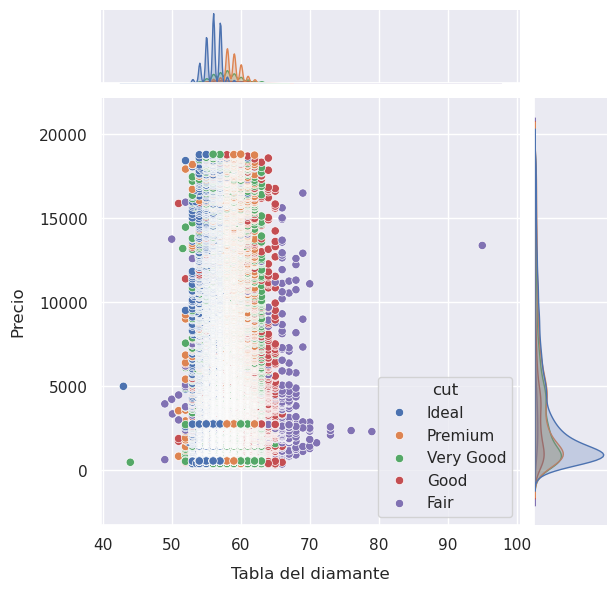

In [97]:
g = sns.jointplot(
    data=diamonds, 
    x="table", 
    y="price",
    hue="cut"
)
g.set_axis_labels("Tabla del diamante", "Precio", labelpad=10)

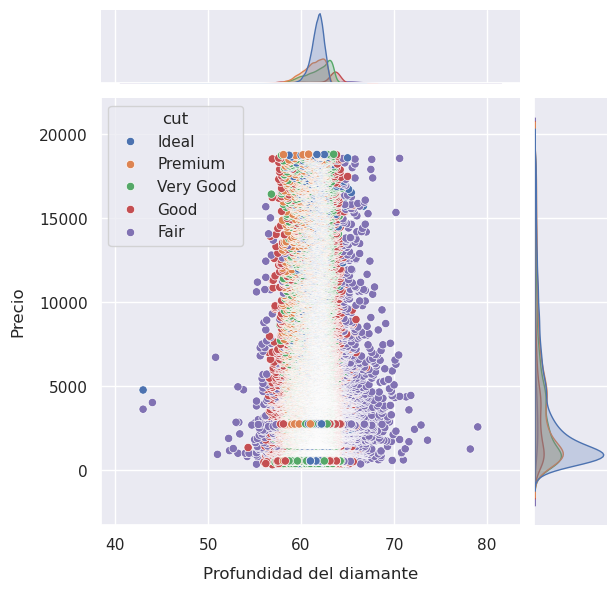

In [98]:
g = sns.jointplot(
    data=diamonds, 
    x="depth", 
    y="price",
    hue="cut"
)
g.set_axis_labels("Profundidad del diamante", "Precio", labelpad=10)

## 5. Utilizar `pairplot()`

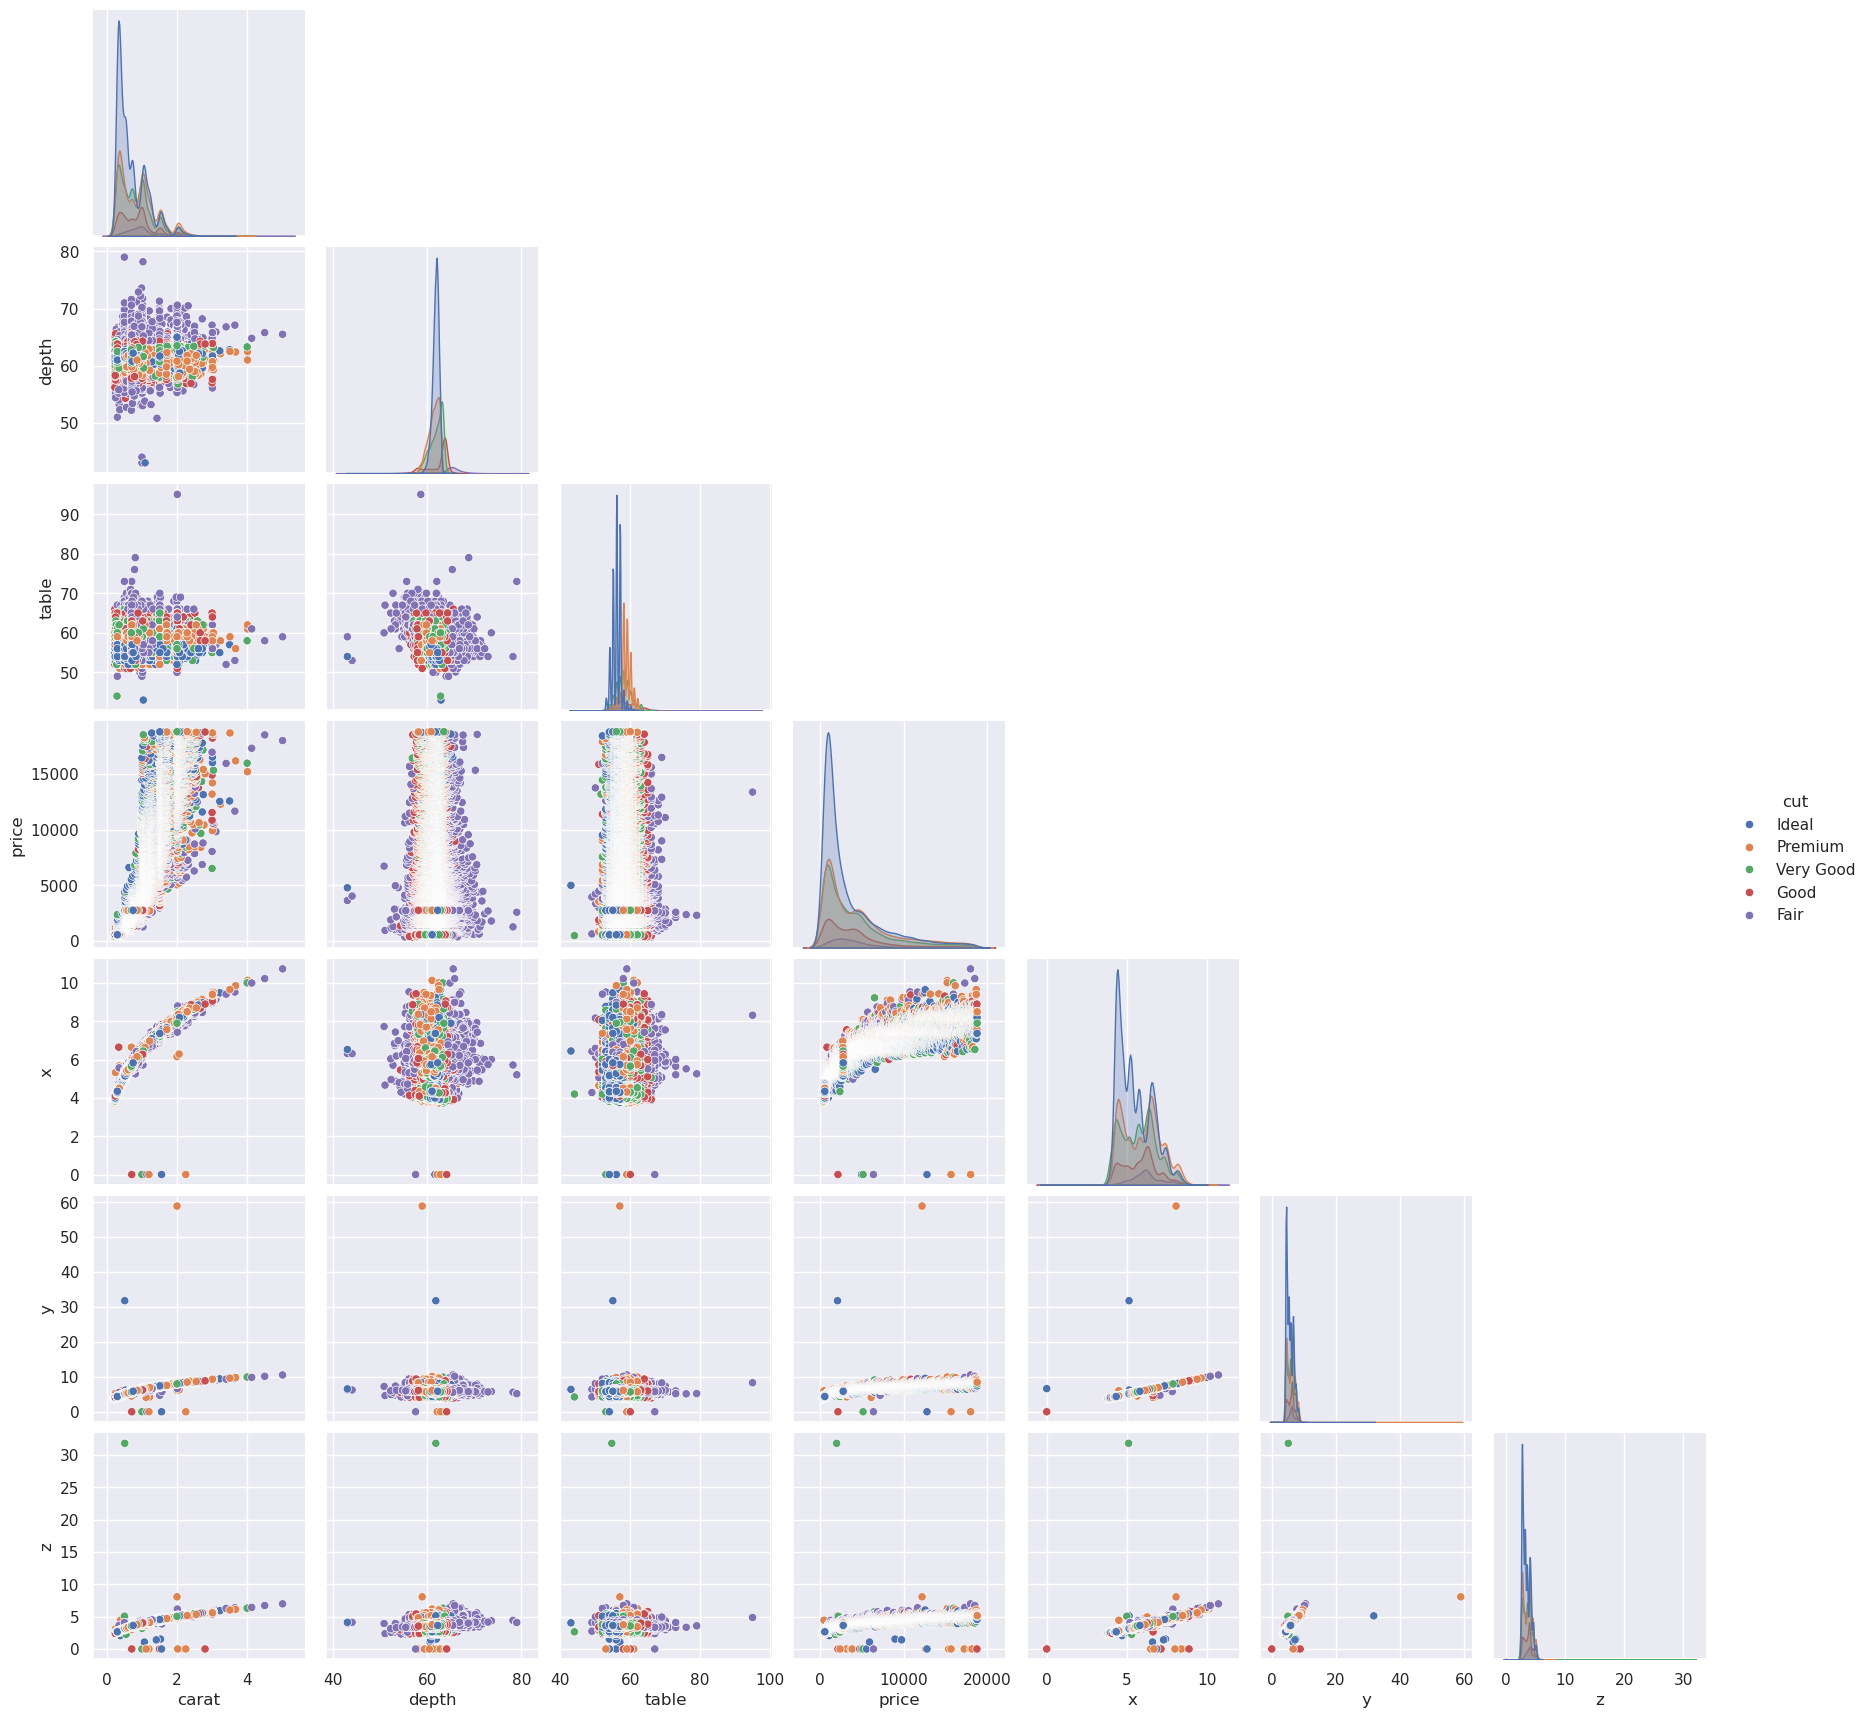

In [8]:
sns.pairplot(diamonds, hue="cut", corner=True)

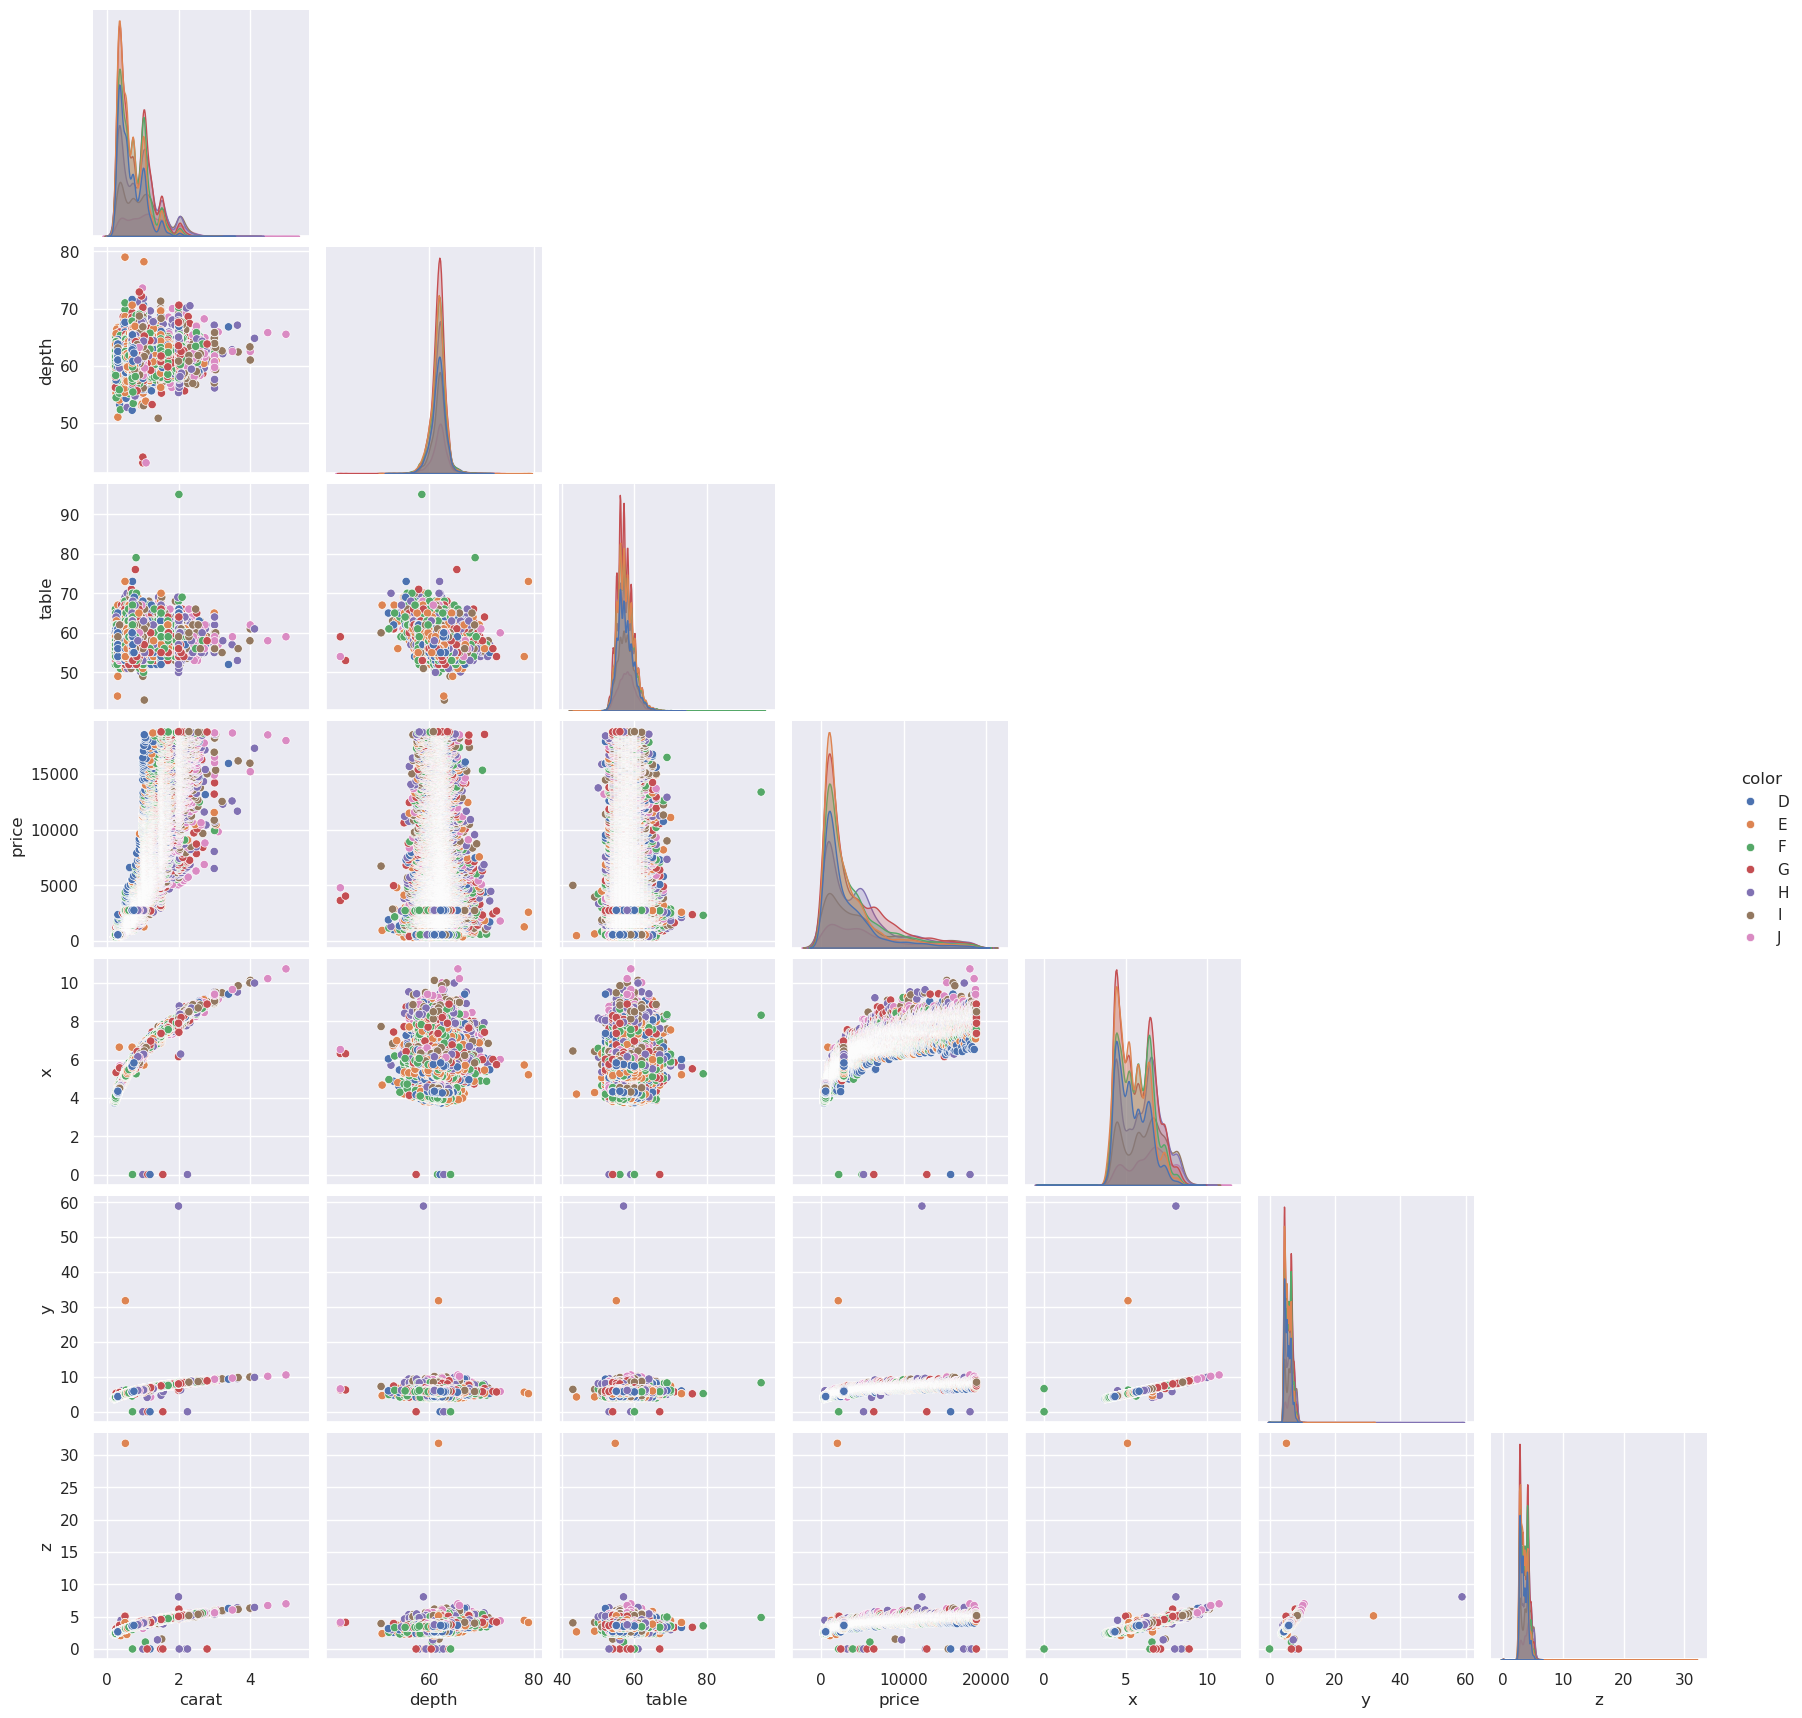

In [9]:
sns.pairplot(diamonds, hue="color", corner=True)

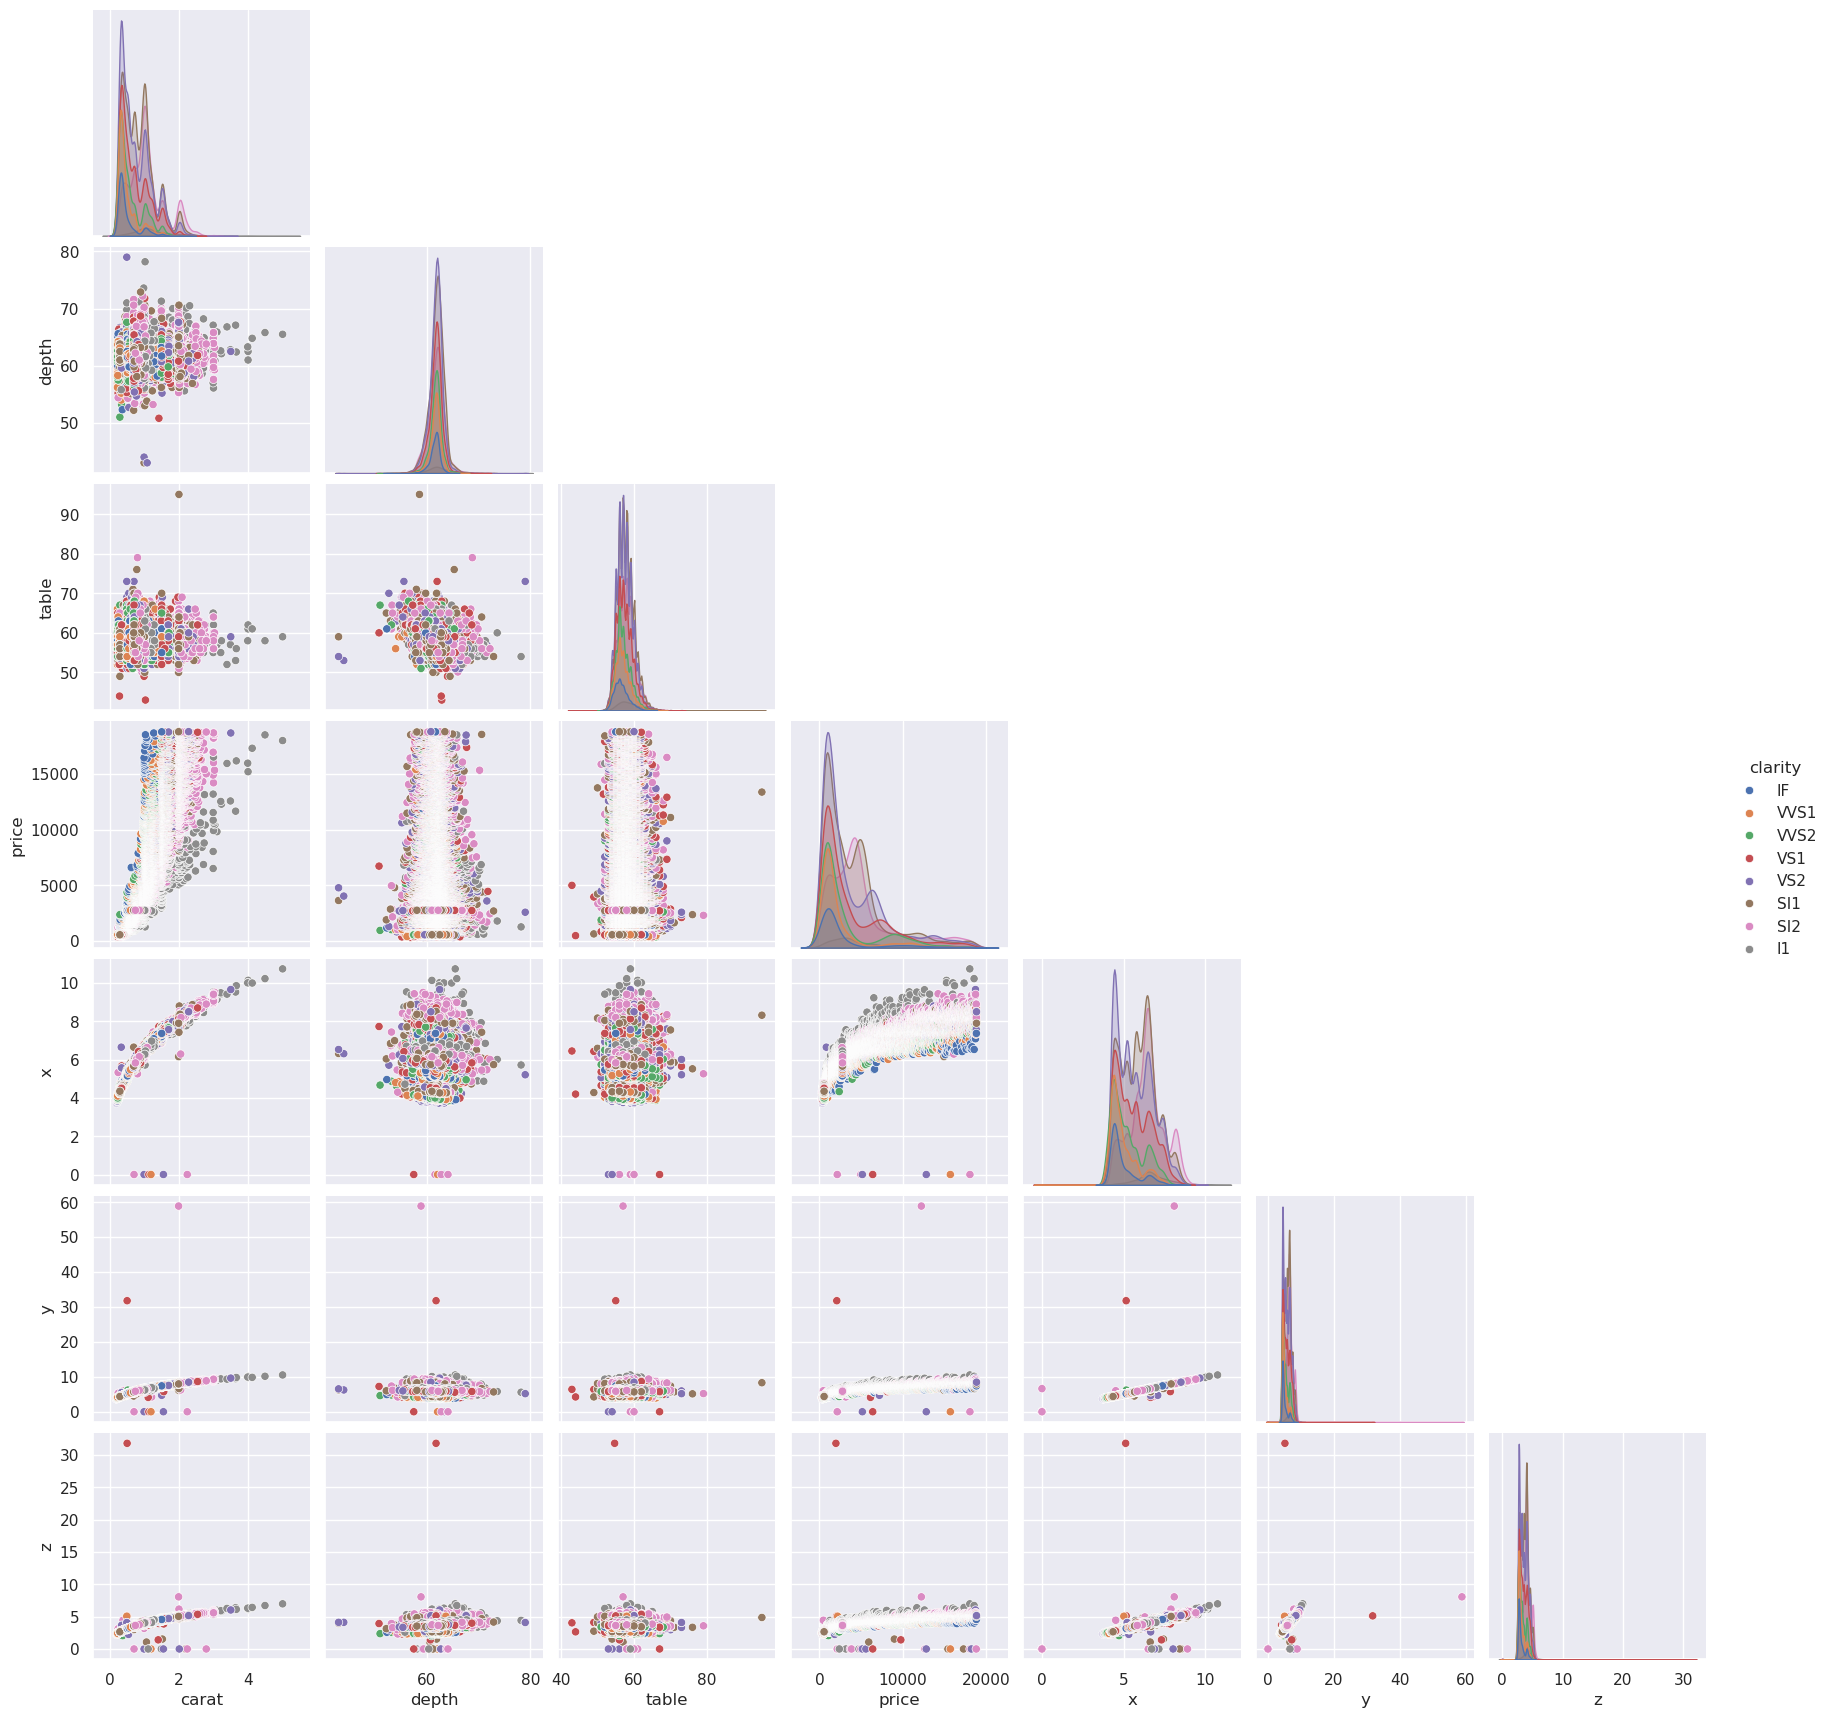

In [10]:
sns.pairplot(diamonds, hue="clarity", corner=True)